# 1.7 Camera Calibration and 3D Reconstruction

# 1.7.1 Camera Calibration

In [21]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt

In [22]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [23]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

In [24]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

In [25]:
images = glob.glob('./img/chess_img/*.png')

In [26]:
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6),None)
    
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,6), corners2,ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)
cv2.destroyAllWindows()

## Calibration

In [27]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

In [28]:
mtx

array([[966.17437143,   0.        , 617.87407121],
       [  0.        , 972.72476535, 381.54932443],
       [  0.        ,   0.        ,   1.        ]])

In [29]:
dist

array([[ 0.00437064, -0.30740809,  0.00117852,  0.00591307,  0.56052318]])

In [30]:
print(rvecs)

[array([[-0.27980113],
       [ 0.01199061],
       [-0.02898601]]), array([[-0.2271163 ],
       [-0.23722212],
       [-0.01472641]]), array([[-0.2749734 ],
       [-0.51285007],
       [ 0.01059443]]), array([[ 0.22493441],
       [-0.55015584],
       [-3.031977  ]]), array([[-0.20930923],
       [-0.27975235],
       [ 0.00339191]]), array([[-0.21691766],
       [ 0.08518302],
       [ 0.02535186]]), array([[-0.01885754],
       [ 0.4113145 ],
       [-3.08480782]]), array([[-0.3687744 ],
       [-0.43884455],
       [ 3.03339765]]), array([[ 0.00558336],
       [ 0.37652924],
       [-3.10008717]]), array([[-0.52337463],
       [ 0.2203439 ],
       [-3.01275682]]), array([[-0.03800111],
       [ 0.25039389],
       [ 3.13128532]]), array([[-0.30326028],
       [-0.34010618],
       [-3.05970822]])]


## Undistortion

In [31]:
img = cv2.imread('./img/chess_img/image50.png')
h, w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

## 1. Using cv2.undistort()

In [32]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('./img/result/calibresult.png',dst)

True

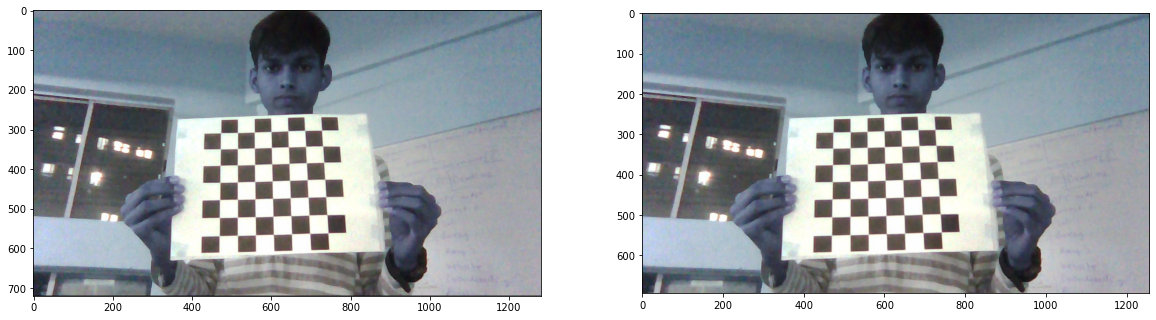

In [34]:
plt.figure(figsize=(20,15))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

## 2. Using remapping

In [35]:
# undistort
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('./img/result/calibresult2.png',dst)

True

## Re-projection Error

In [39]:
tot_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    tot_error += error
print("mean error: ", tot_error/len(objpoints))

mean error:  0.0895469680853578
